### We aim to predict the wine quality using machine learning algorithms based on the following features:
1. fixed acidity
2. volatile acidity
3.   citric acid
4.   residual sugar
5.   chlorides
6.   free sulfur dioxide
7.   total sulfur dioxide
8.   density
9.   pH
10.  sulphates
11.  alcohol


### We will explore various algorithms (e.g., Random Forest, SVM, KNN, Logistic Regression) to train models on the wine quality dataset. By leveraging cross-validation and hyperparameter tuning with GridSearchCV, we optimized model performance metrics like accuracy, aiming to enhance predictive capabilities.

In [207]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# 1. Data import and Data Exploration

### 1.1 Reading both the Red and White wine datasets

In [208]:
red_data = pd.read_csv("winequality-red.csv")
white_data = pd.read_csv("winequality-white.csv")

In [209]:
red_data['color'] = 'Red'
red_data.shape

(1599, 13)

In [210]:
white_data['color'] = 'White'
white_data.shape

(4898, 13)

### 1.2 Combining both red and white wine datasets into one unified data set with added column "Color"

In [211]:
wine_data = pd.concat([red_data, white_data], axis=0)
wine_data.shape

(6497, 13)

In [212]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


In [213]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [214]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


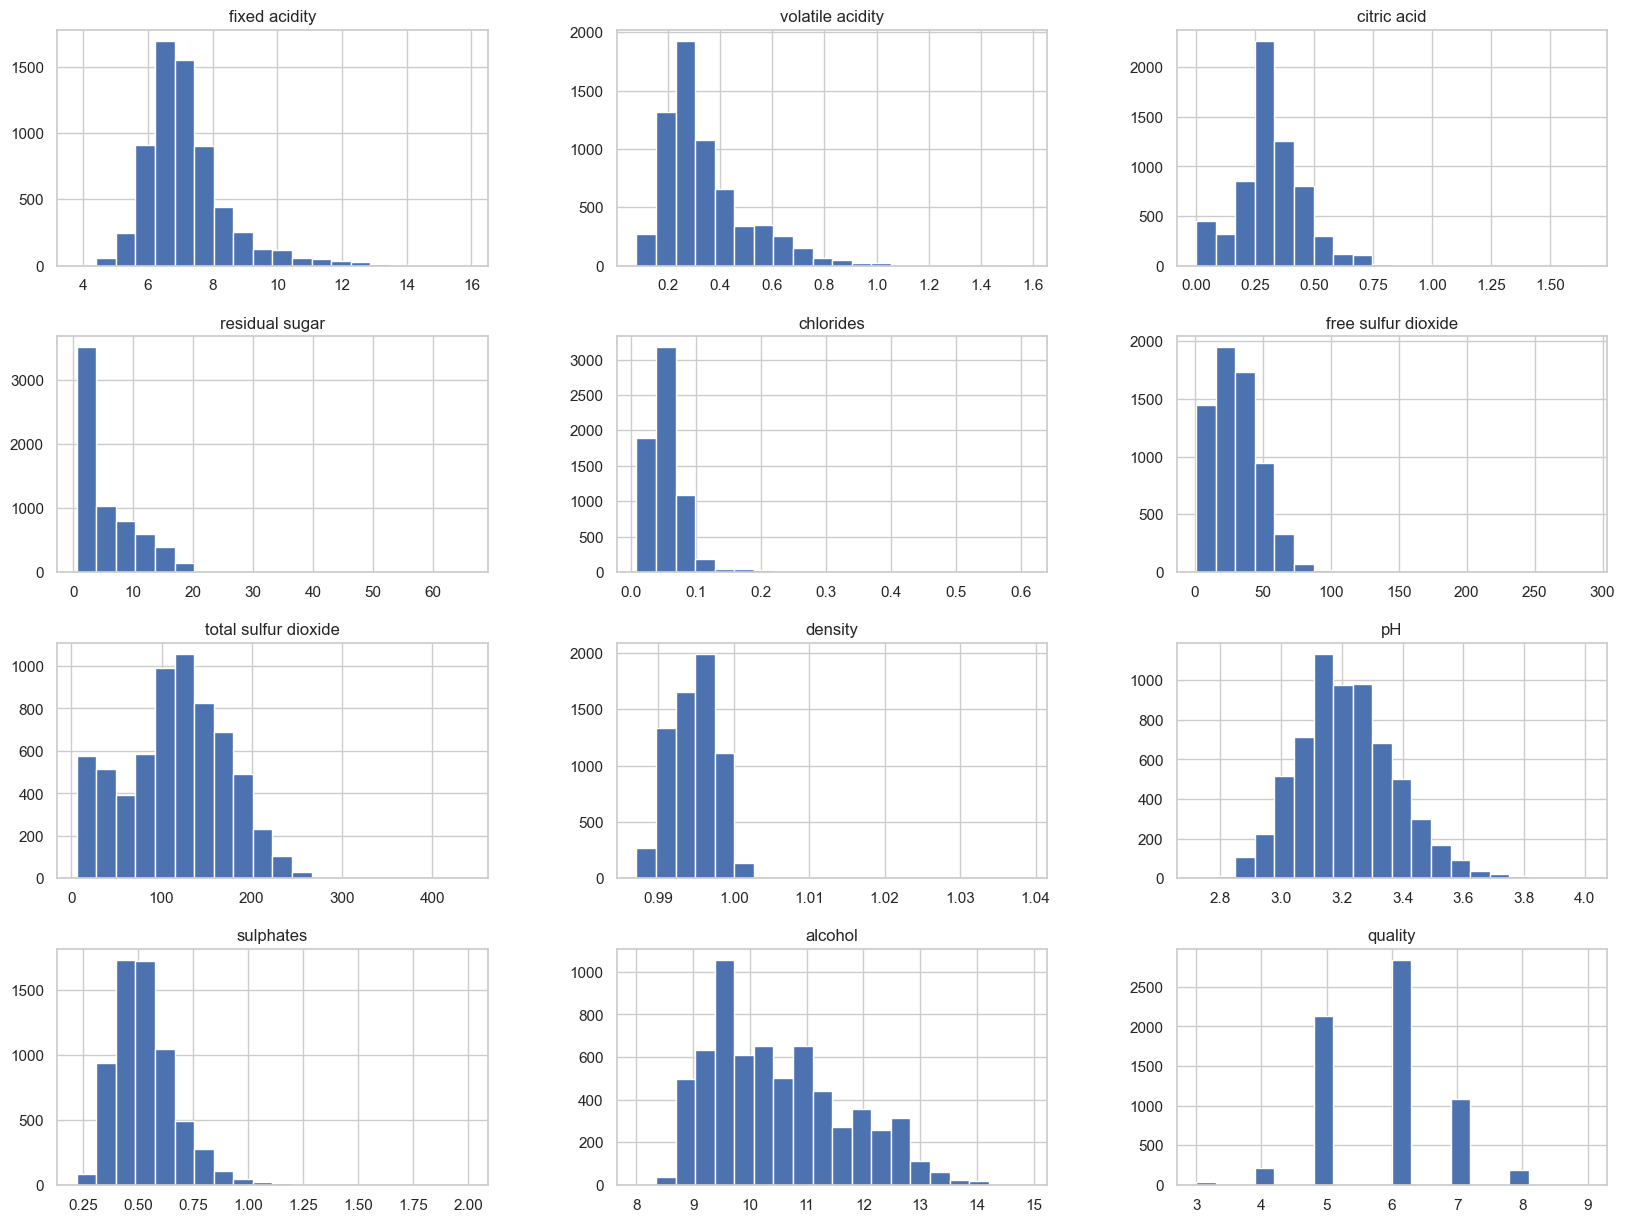

In [215]:
sns.set(style="whitegrid")

# Plot histograms for each feature
wine_data.hist(bins=20, figsize=(20, 15))
plt.show()


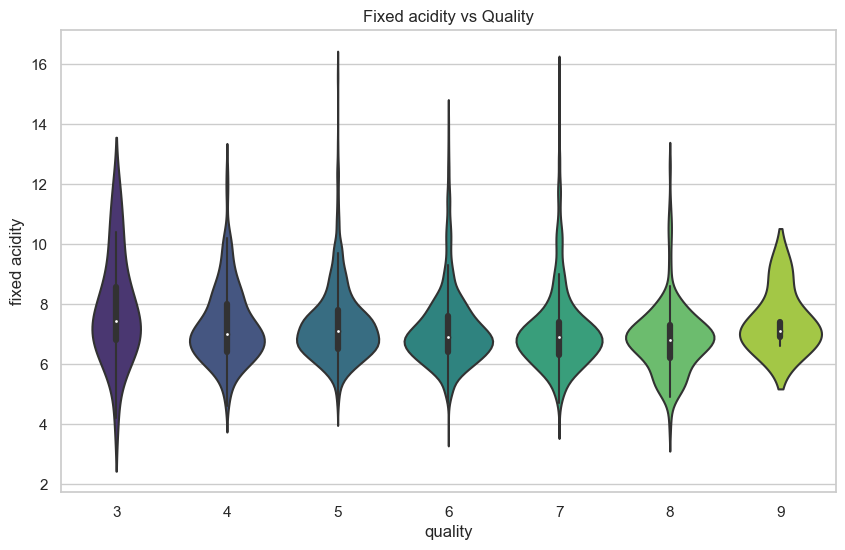

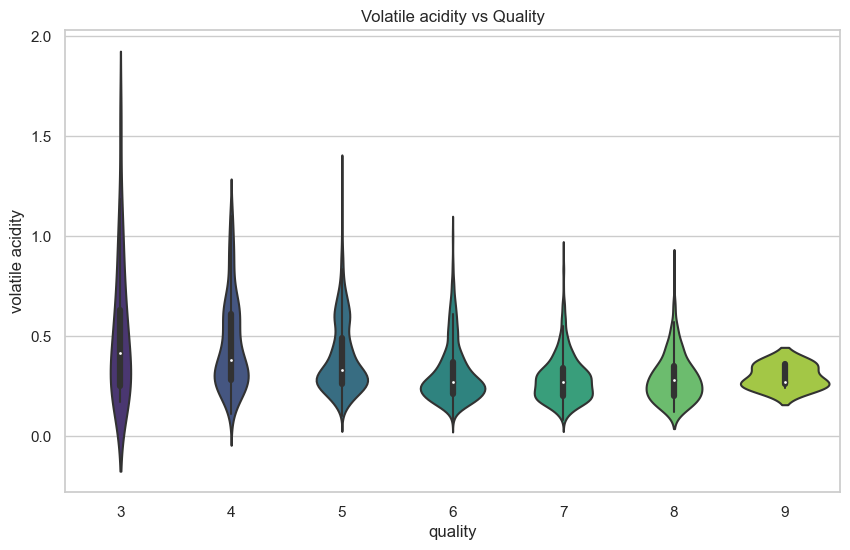

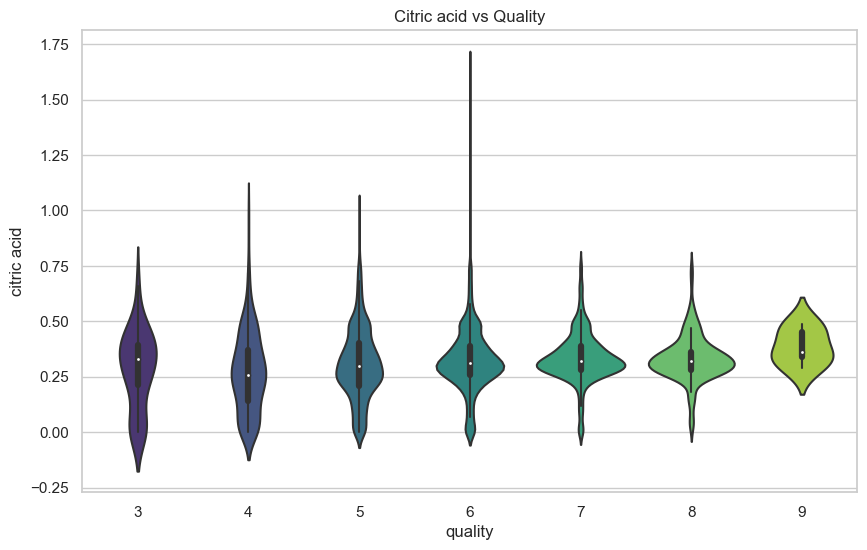

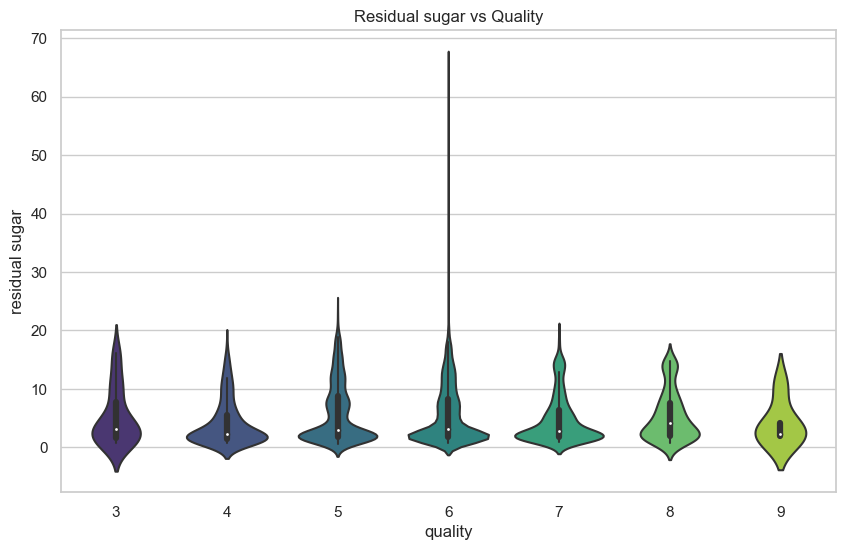

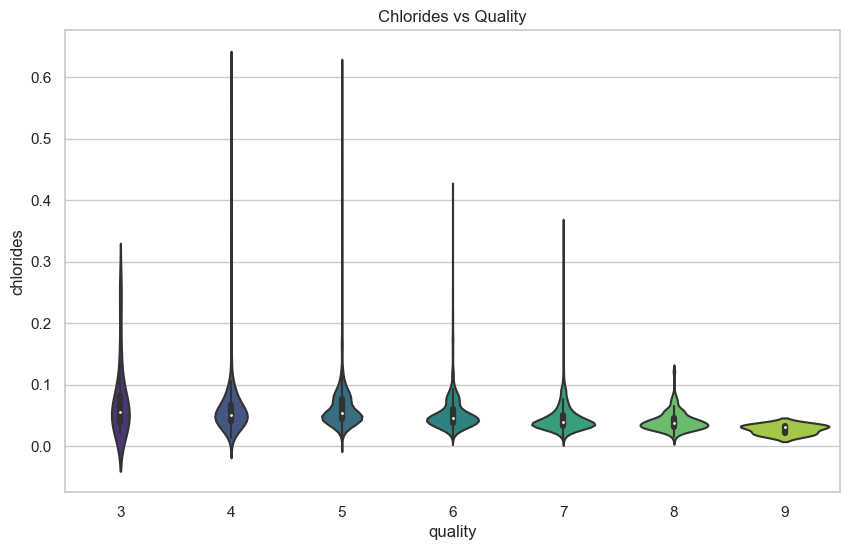

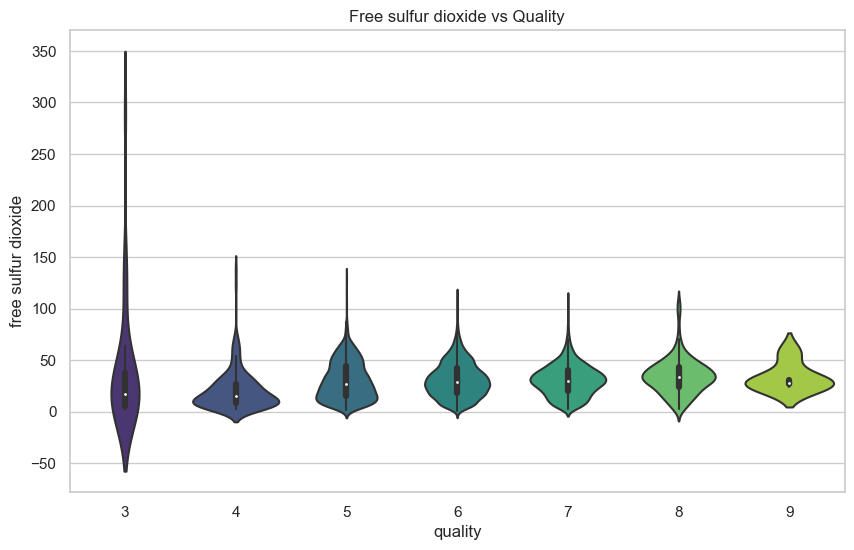

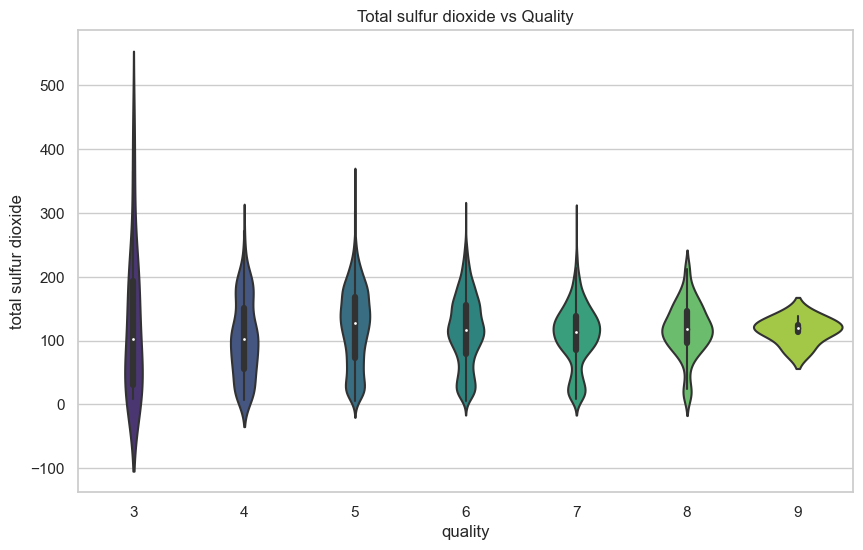

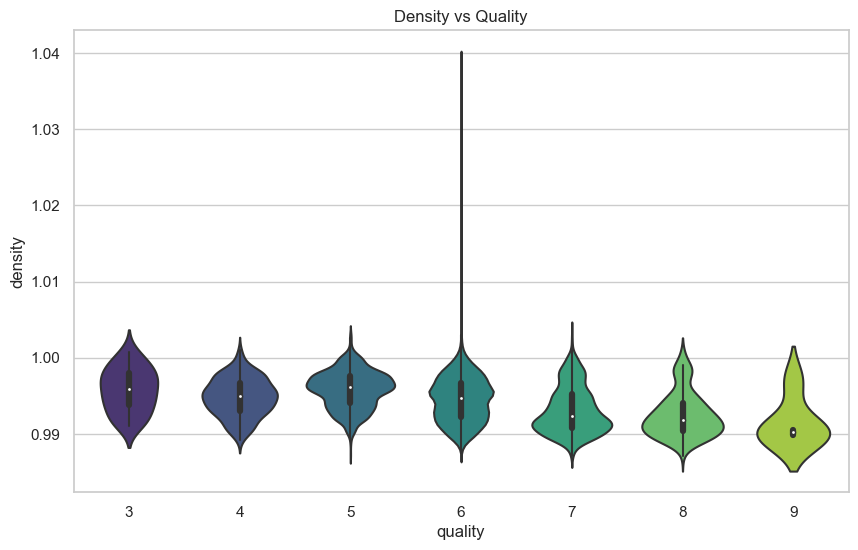

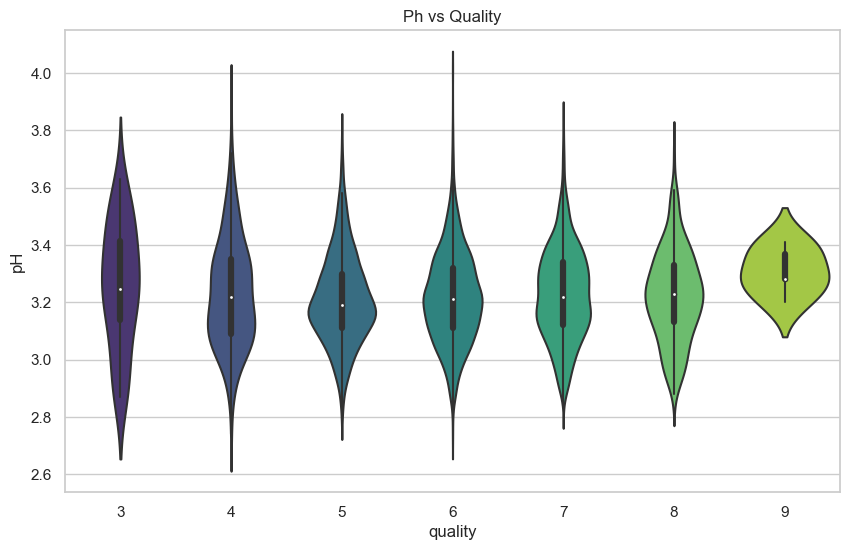

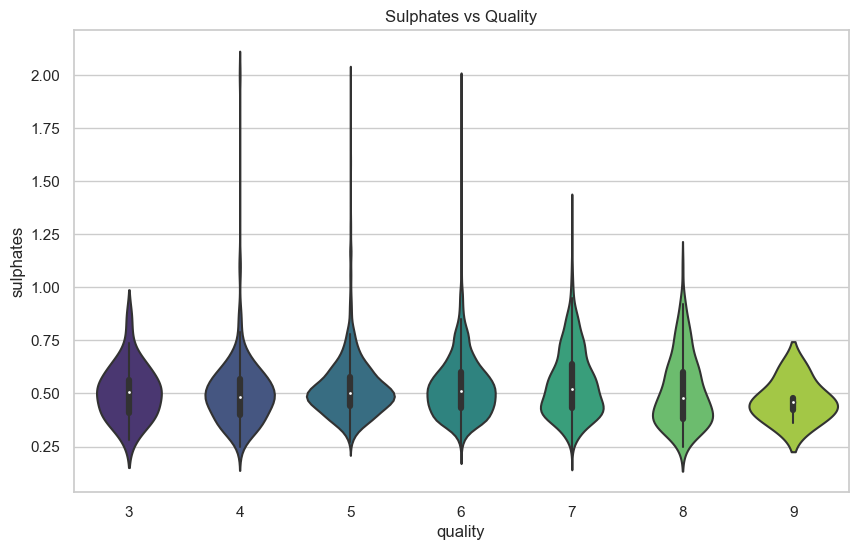

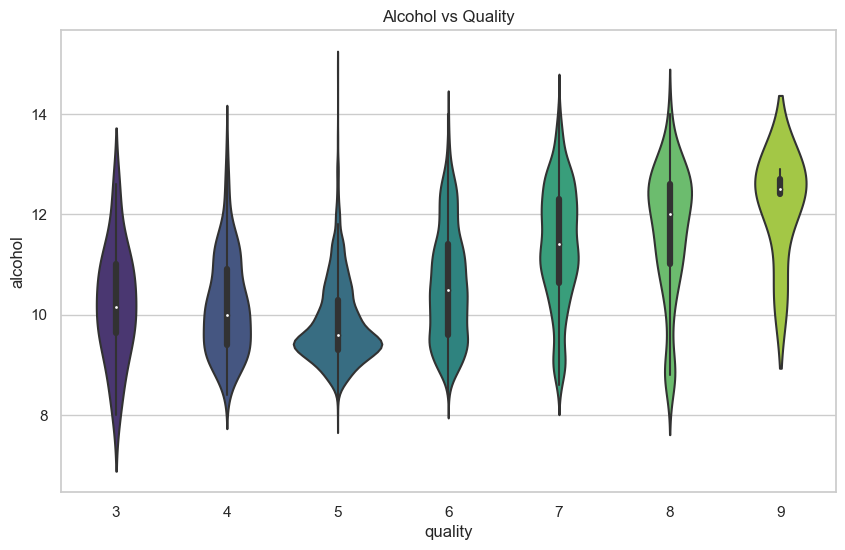

In [216]:

# Violin plots to see the distribution
for column in wine_data.columns[:-2]:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='quality', y=column, data=wine_data, palette='viridis')
    plt.title(f'{column.capitalize()} vs Quality')
    plt.show()

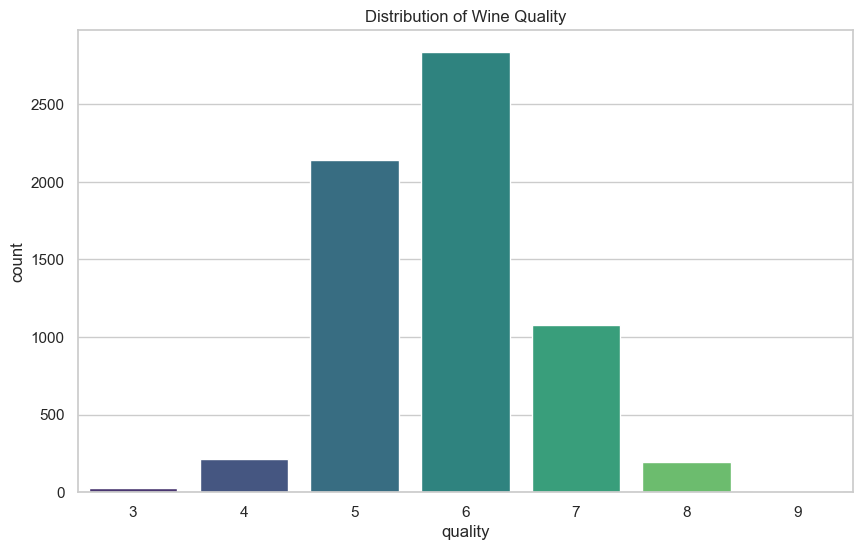

In [217]:

# Plot the distribution of wine quality
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=wine_data, palette='viridis')
plt.title('Distribution of Wine Quality')
plt.show()

In [218]:
corr_matrix = wine_data.corr()
correlation_with_target = corr_matrix['quality'].sort_values(ascending=False)
print(correlation_with_target)

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


C:\Users\Venky_PrivCo\AppData\Local\Temp\ipykernel_9568\4074436016.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = wine_data.corr()


Strong Correlations: 
1. alcohol (positive correlated) 
2. density (negative correlated)
3. volatile acidity (negative correlated) 

Weak Correlations: 
1. citric acid
2. free sulfur dioxide
3. sulphates 
4. pH
5. residual sugar
6. total sulfur dioxide
7. fixed acidity 


# 2. Model Development

In [219]:
X = wine_data.drop(['color','quality'], axis=1)
# X = wine_data[['density','alcohol','volatile acidity']]
y = wine_data['quality']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [220]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")


Logistic Regression Accuracy: 0.52


C:\Users\Venky_PrivCo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [221]:
# K-Nearest Neighbors Classifier (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"KNN Accuracy: {knn_accuracy:.2f}")


KNN Accuracy: 0.45


In [222]:
# Support Vector Classifier (SVC)
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_pred)
print(f"SVC Accuracy: {svc_accuracy:.2f}")

SVC Accuracy: 0.45


In [223]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")


Random Forest Accuracy: 0.67


### 2.1 Cross Validation Scores

In [224]:
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('SVC', SVC(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42))
]

# Perform cross-validation and print results
for name, model in models:
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name} - Cross-validated Accuracy: {cv_scores.mean():.2f} (std: {cv_scores.std():.2f})")

Random Forest - Cross-validated Accuracy: 0.48 (std: 0.05)
SVC - Cross-validated Accuracy: 0.39 (std: 0.06)
KNN - Cross-validated Accuracy: 0.39 (std: 0.03)


C:\Users\Venky_PrivCo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Venky_PrivCo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

Logistic Regression - Cross-validated Accuracy: 0.48 (std: 0.04)


C:\Users\Venky_PrivCo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [225]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# 3. Model Evaluation

In [226]:
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.67


In [227]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[  0   0   2   4   0   0   0]
 [  1   5  25  12   0   0   0]
 [  0   1 286 111   4   0   0]
 [  0   1 112 449  35   0   0]
 [  0   0   2  93 119   1   0]
 [  0   0   0  15   9  12   0]
 [  0   0   0   0   1   0   0]]


In [228]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.71      0.12      0.20        43
           5       0.67      0.71      0.69       402
           6       0.66      0.75      0.70       597
           7       0.71      0.55      0.62       215
           8       0.92      0.33      0.49        36
           9       0.00      0.00      0.00         1

    accuracy                           0.67      1300
   macro avg       0.52      0.35      0.39      1300
weighted avg       0.67      0.67      0.66      1300



C:\Users\Venky_PrivCo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Venky_PrivCo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Venky_PrivCo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 4. Hyperparameter tuning using GridSearchCV

In [229]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
print('Best Parameters:', grid_search.best_params_)

# Train the best model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
print('Best Model Accuracy:', accuracy_score(y_test, y_pred_best))
print('Best Model Confusion Matrix:\n', confusion_matrix(y_test, y_pred_best))
print('Best Model Classification Report:\n', classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Model Accuracy: 0.6807692307692308
Best Model Confusion Matrix:
 [[  0   0   2   4   0   0   0]
 [  1   5  26  11   0   0   0]
 [  0   1 289 109   3   0   0]
 [  0   1 106 457  33   0   0]
 [  0   0   1  91 122   1   0]
 [  0   0   0  13  11  12   0]
 [  0   0   0   1   0   0   0]]
Best Model Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.71      0.12      0.20        43
           5       0.68      0.72      0.70       402
           6       0.67      0.77      0.71       597
           7       0.72      0.57      0.64       215
           8       0.92      0.33      0.49        36
           9       0.00      0.00      0.00         1

    accuracy                           0.68      1300
   macro avg       0.

C:\Users\Venky_PrivCo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Venky_PrivCo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Venky_PrivCo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 ### 5. Conclusion

GridSearchCV improves accuracy by systematically searching through hyperparameter combinations, optimizing model performance through cross-validation. 
 
 
It ensures that the model is tuned to perform well on unseen data, thus enhancing overall predictive accuracy. This improves the model accuracy score for the RandomForest model from 0.67 to 0.68